In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

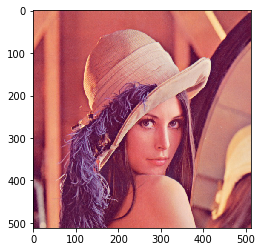

In [2]:
img = cv2.imread('lenna.jpg')
#cv2.imshow('lenna.jpg', img)
"""key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()"""
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

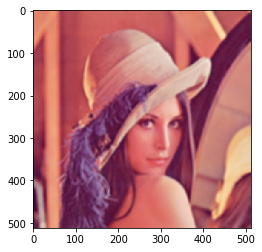

In [3]:
# Gaussian Kernel Effect
g_img = cv2.GaussianBlur(img, (7, 7), 5)
plt.figure()
plt.imshow(cv2.cvtColor(g_img, cv2.COLOR_BGR2RGB))
plt.show()

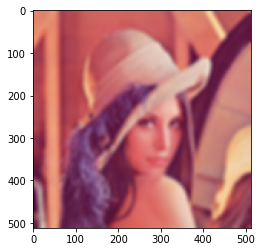

In [4]:
# increase kernel size, more blur effect
g_img = cv2.GaussianBlur(img, (17, 17), 5)
plt.figure()
plt.imshow(cv2.cvtColor(g_img, cv2.COLOR_BGR2RGB))
plt.show()

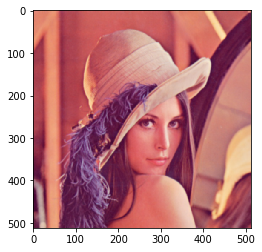

In [5]:
# reduce variance, image became more clear, center points play more roles
g_img = cv2.GaussianBlur(img, (7, 7), 1)
plt.figure()
plt.imshow(cv2.cvtColor(g_img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# gaussian kernel
kernel = cv2.getGaussianKernel(7, 5)
print(kernel)

[[0.12895603]
 [0.14251846]
 [0.15133131]
 [0.1543884 ]
 [0.15133131]
 [0.14251846]
 [0.12895603]]


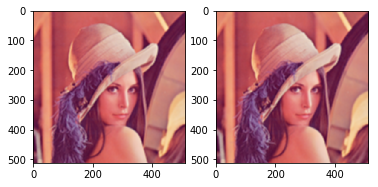

In [7]:
# gaussian kernel is 1D array, running faster
g1_img = cv2.GaussianBlur(img, (7, 7), 5)
g2_img = cv2.sepFilter2D(img, -1, kernel, kernel) # ori, depth, kernelX, kernelY
plt.figure()
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(g1_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(g2_img, cv2.COLOR_BGR2RGB))
plt.show()

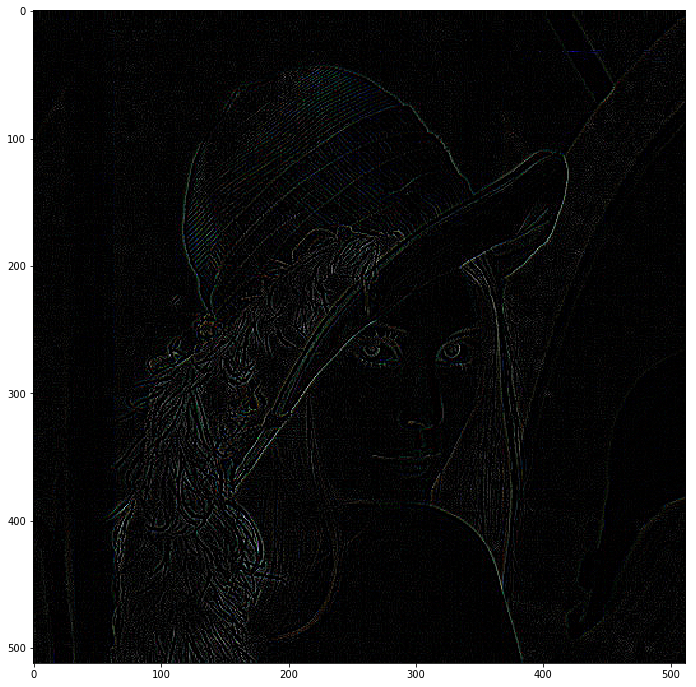

In [8]:
# 2nd derivative: laplacian (bilateral filter)
kernel_lap = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
lap_img = cv2.filter2D(img, -1, kernel = kernel_lap)
plt.figure(figsize = (12, 12))
plt.imshow(cv2.cvtColor(lap_img, cv2.COLOR_BGR2RGB))
plt.show()

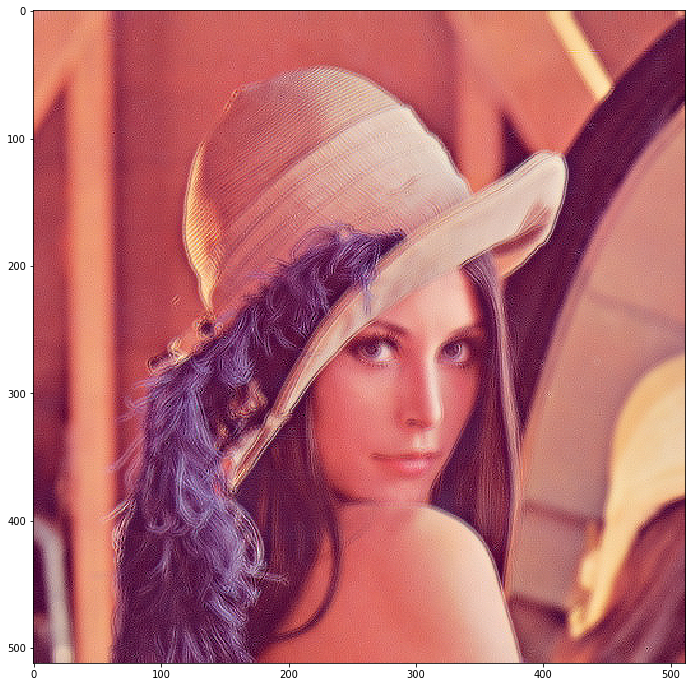

In [9]:
# sharpen = edge + ori
kernel_sharp = np.array([[0, 1, 0], [1, -3, 1], [0, 1, 0]], np.float32)
lap_img = cv2.filter2D(img, -1, kernel = kernel_sharp)
plt.figure(figsize = (12, 12))
plt.imshow(cv2.cvtColor(lap_img, cv2.COLOR_BGR2RGB))
plt.show()

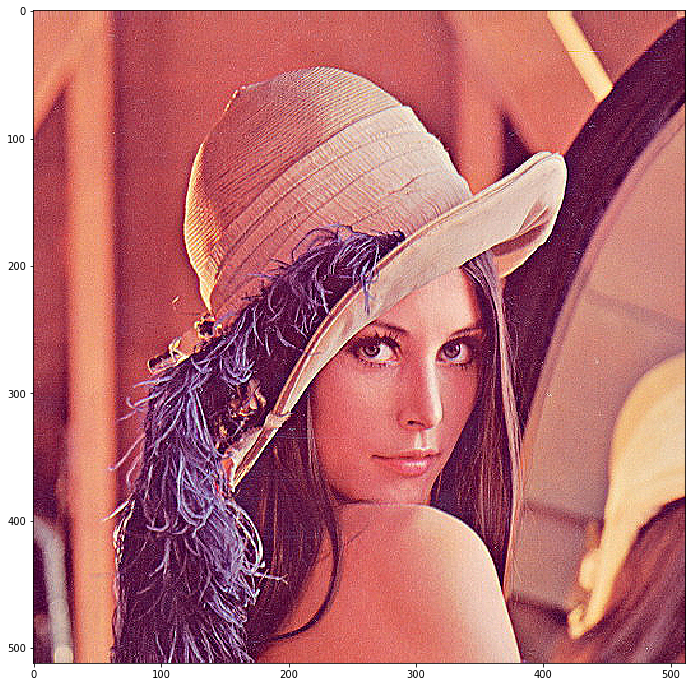

In [10]:
# above kernel_sharp is wrong, slight edge effect, because value 1 around center -3, 1 make kernel have filter effect,
# and make figure blur
# solution: get opposite of kernel_lap, and plus original image, to highlight center pixel, similar to Gaussian blur
# with smaller variance, so that keep both edge effect and resolution of image
kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
lap_img = cv2.filter2D(img, -1, kernel = kernel_sharp)
plt.figure(figsize = (12, 12))
plt.imshow(cv2.cvtColor(lap_img, cv2.COLOR_BGR2RGB))
plt.show()

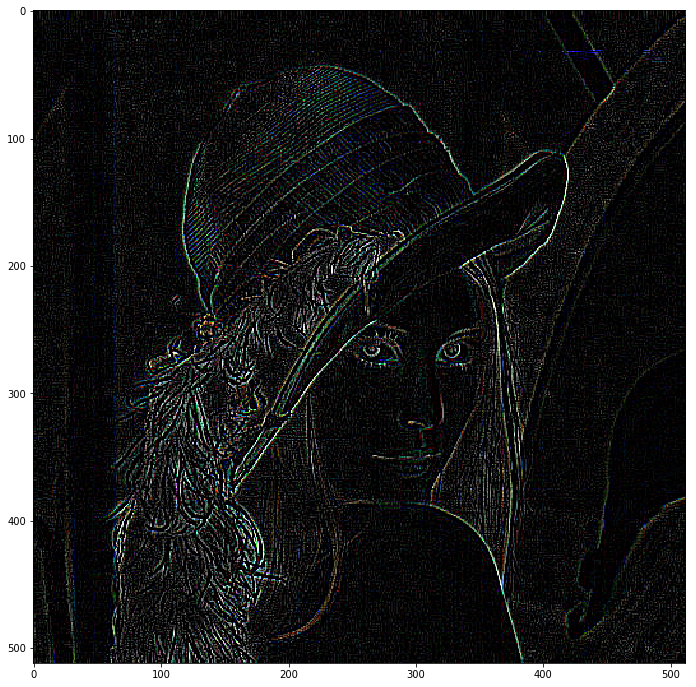

In [11]:
# more aggressive edge effect
# apart gradient in X-Y direction, consider gradient of diagonal
kernel_sharp = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)
lap_img = cv2.filter2D(img, -1, kernel = kernel_sharp)
plt.figure(figsize = (12, 12))
plt.imshow(cv2.cvtColor(lap_img, cv2.COLOR_BGR2RGB))
plt.show()

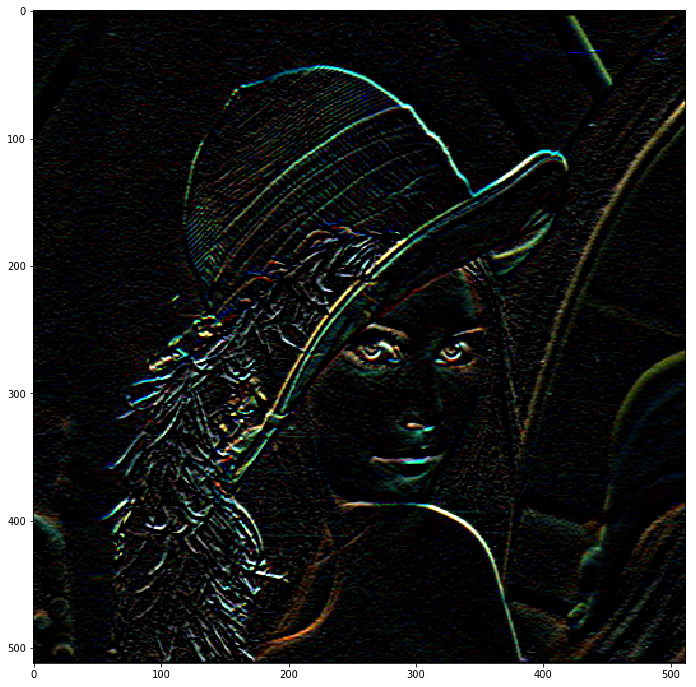

In [12]:
########### Edge ##############
# X axis
edgex = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
sharp_img = cv2.filter2D(img, -1, kernel = edgex)
plt.figure(figsize = (12, 12))
plt.imshow(cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB))
plt.show()

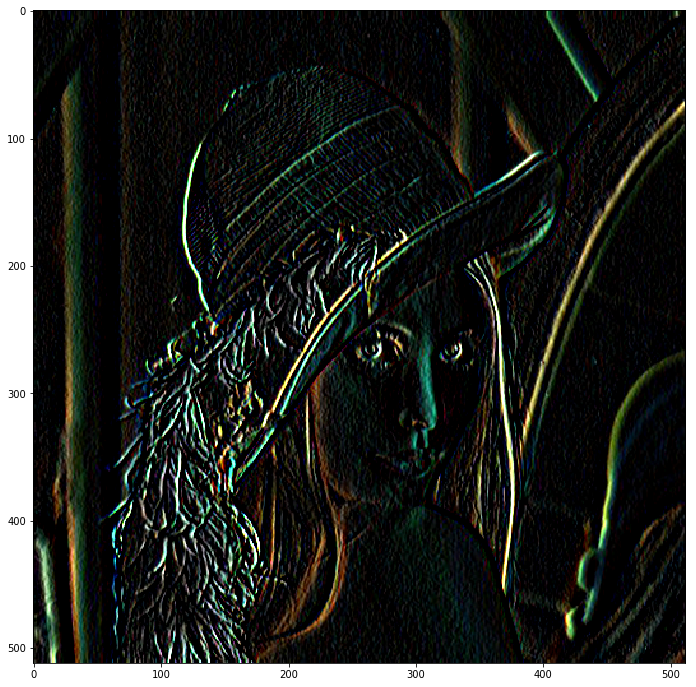

In [13]:
# Y axis
edgey = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
sharpy_img = cv2.filter2D(img, -1, kernel = edgey)
plt.figure(figsize = (12, 12))
plt.imshow(cv2.cvtColor(sharpy_img, cv2.COLOR_BGR2RGB))
plt.show()

[[19. 19. 19. ... 42. 37. 39.]
 [20. 19. 21. ... 41. 43. 46.]
 [21. 22. 21. ... 47. 48. 40.]
 ...
 [18. 15.  7. ...  4.  0.  6.]
 [11.  6.  8. ...  9.  9.  2.]
 [ 1.  2.  4. ...  5.  6. 12.]]


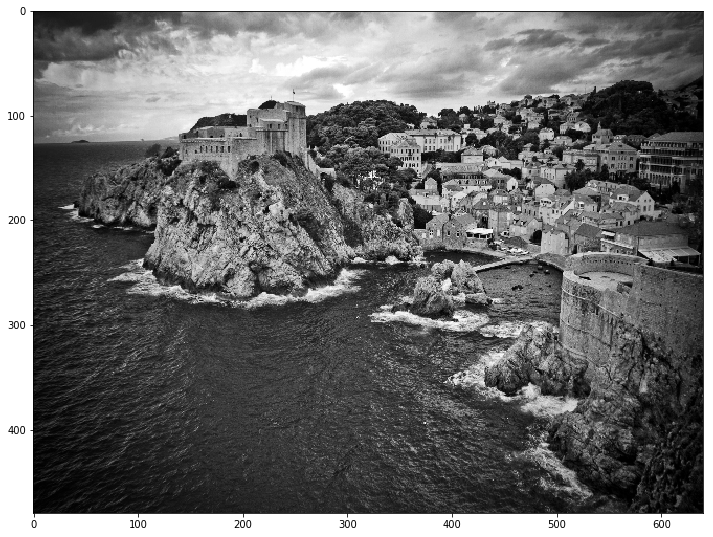

In [14]:
# corner
img = cv2.imread('view.jpg')
img = cv2.resize(img, (640, 480))
img_gray = np.float32(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
print(img_gray)
plt.figure(figsize = (12, 12))
plt.imshow(img_gray, 'gray')
plt.show()

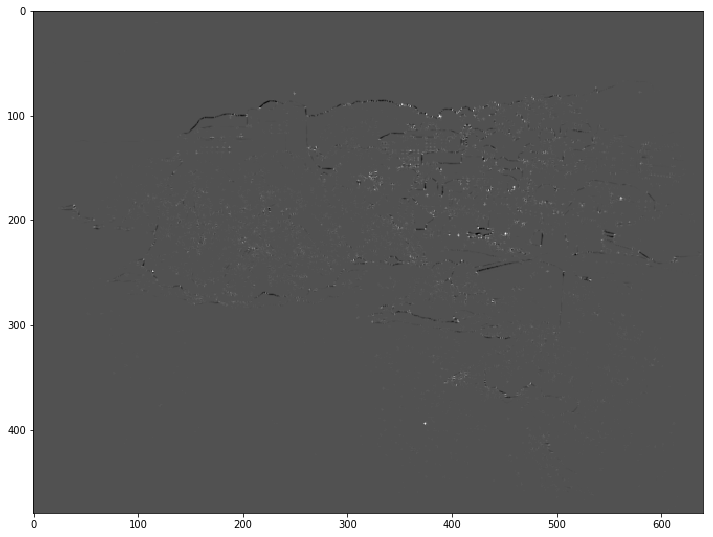

[[-2.35156238e-01 -2.35156238e-01  3.59912097e-01 ... -9.75781250e+01
   5.49000000e+02 -1.78000011e+01]
 [-2.35156238e-01 -2.35156238e-01  3.59912097e-01 ... -9.75781250e+01
   5.49000000e+02 -1.78000011e+01]
 [-1.64887691e+00 -1.64887691e+00 -2.96879888e+00 ...  4.04084900e+02
   5.07714844e+02  3.75887512e+02]
 ...
 [ 1.06660690e+02  1.06660690e+02  1.72025330e+02 ... -2.88072723e+02
   1.12616745e+02  2.86183586e+01]
 [ 9.95331421e+01  9.95331421e+01  4.31247559e+01 ...  2.45787292e+02
   8.07644043e+01 -1.48742199e+01]
 [-2.54391418e+02 -2.54391418e+02 -8.14812546e+01 ... -1.67785645e+01
   3.05220222e+01 -7.78129864e+00]]


In [15]:
img_harris = cv2.cornerHarris(img_gray, 2, 3, 0.05)
plt.figure(figsize = (12, 12))
plt.imshow(img_harris, 'gray')
plt.show()
# 1. harris is float type, 2. img_harris essentially is harris response of each pixel
print(img_harris)

In [16]:
# to view clearly
# img_harris_dilate = cv2.dilate(img_harris, None)

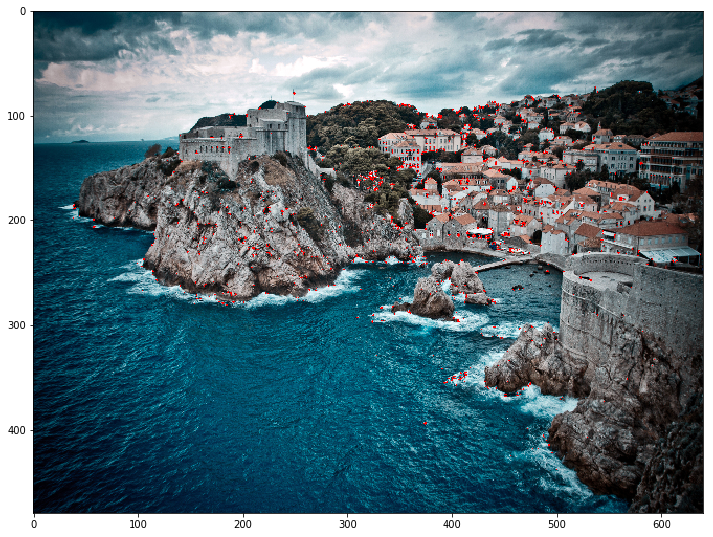

In [17]:
thres = 0.05 * np.max(img_harris)
img[img_harris > thres] = [0, 0, 255]
plt.figure(figsize = (12, 12))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(1110, 128)


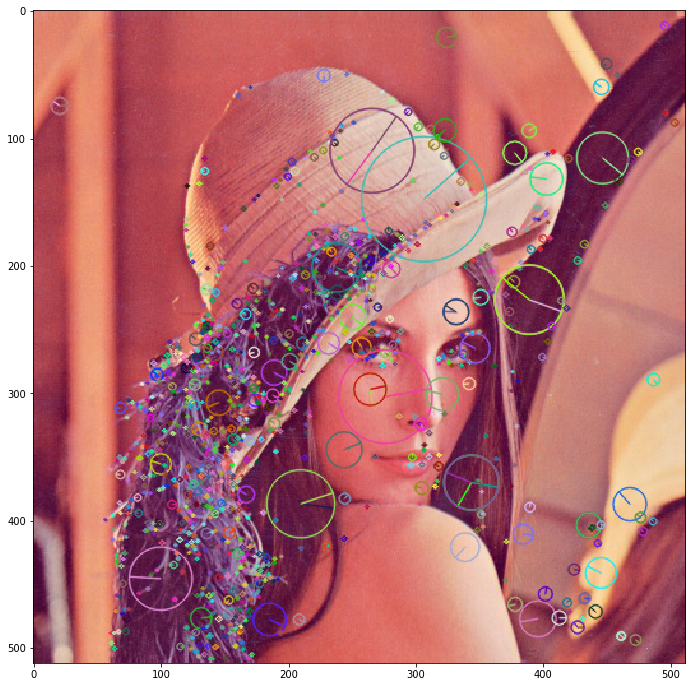

In [18]:
############# SIFT ###############
img = cv2.imread('lenna.jpg')
# create sift class
sift = cv2.xfeatures2d.SIFT_create()
# detect SIFT
kp = sift.detect(img, None) # None for mask
# compute SIFT descriptor
kp, des = sift.compute(img, kp)
print(des.shape)
img_sift = cv2.drawKeypoints(img, kp, outImage = np.array([]), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (12, 12))
plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
plt.show()